In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive")
df = pd.read_csv("dataset-72001.csv")

Mounted at /content/drive


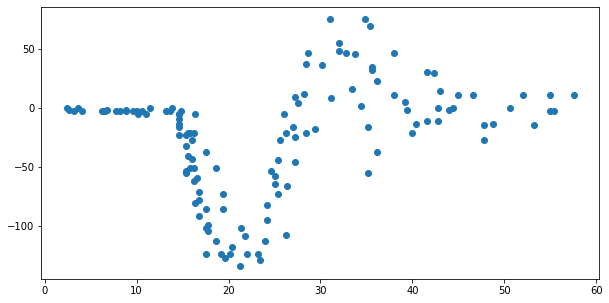

In [ ]:
x = np.array(df.values)[:,0]
y = np.array(df.values)[:,1]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y)

# 1. Learning Generalised Linear Models

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


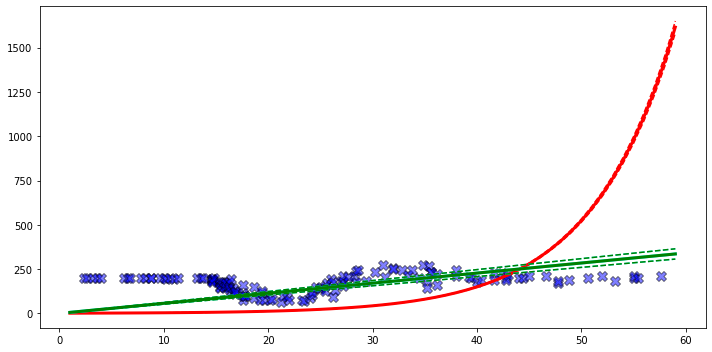

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# generate data
# x = np.array([[i] for i in np.random.choice(range(1,10), 20)])
# y = np.array([np.exp(i) + np.random.normal(0,0.25*np.exp(i),1)[0] for i in x])
x = np.array(df.values)[:,0]
y = np.array(df.values)[:,1]
# make sure that the values are positive
# y[y<0] = 0
y = y+200
# create models
m_poisson = sm.GLM(y,x, family=sm.families.Poisson())
m_poisson_results = m_poisson.fit()
m_gaussian = sm.GLM(y,x, family=sm.families.Gaussian())
m_gaussian_results = m_gaussian.fit()
m_third = sm.GLM(y,x, family=sm.families.Gaussian())
m_third_results = m_third.fit()
# prediction
x_pred = np.arange(1,60).reshape(-1,1)
# x_pred = np.arange(1,11).reshape(-1,1)
y_pred = m_poisson_results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_gaussian = m_gaussian_results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_third = m_third_results.get_prediction(x_pred).summary_frame(alpha=0.05)
# plot results
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.scatter(x,y,marker='X',color='blue',edgecolor='black',s=100,alpha=0.5,zorder=1)
plt.plot(x_pred,y_pred['mean'],color='red',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred['mean_ci_lower'], color='red',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred['mean_ci_upper'], color='red',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean'],color='cyan',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_lower'], color='cyan',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_upper'], color='cyan',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred_third['mean'],color='green',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred_third['mean_ci_lower'], color='green',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred_third['mean_ci_upper'], color='green',linestyle='--',zorder=2)
plt.tight_layout()

*This is not surprisingly a terrible fit.*

*+200 used instead of excluding points below zero.*

# OLS Model

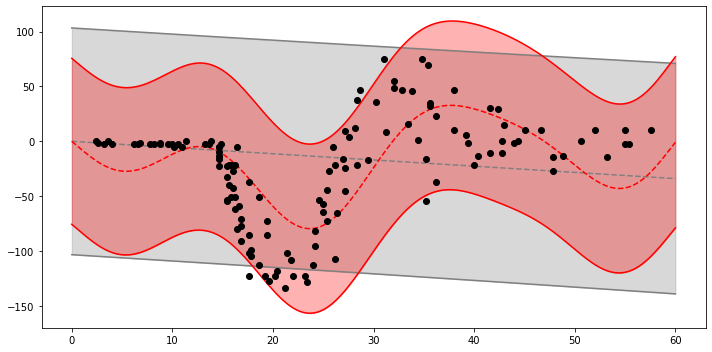

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
np.random.seed(42)
x = np.array(df.values)[:,0]
y = np.array(df.values)[:,1]
# x = np.linspace(0,15,50)
# y = 0.2*np.sin(x) + 0.5*np.sin(x**2/40) + 0.05*x
# y += 0.05*np.random.randn(x.shape[0])
m_linear = sm.OLS(y,x)
results = m_linear.fit()
scale = 3
k = 4
design = np.concatenate((np.sin(x/scale).reshape(-1,1),np.sin((x/scale)**2/40).reshape(-1,1), x.reshape(-1,1)),axis=1)
# design = np.concatenate((np.sin(x).reshape(-1,1),np.sin(x**2/40).reshape(-1,1), x.reshape(-1,1)),axis=1)
m_linear_basis = sm.OLS(y,design)
results_basis = m_linear_basis.fit()
x_pred = np.linspace(0,60,200).reshape(-1,1)
# x_pred = np.linspace(0,20,200).reshape(-1,1)
design_pred = np.concatenate((np.sin(x_pred/scale), np.sin((x_pred/scale)**2/40), x_pred),axis=1)
y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,zorder=2, color='black')
ax.plot(x_pred, y_pred_linear['mean'], color='gray',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'],color='gray',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'],color='gray',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'],y_pred_linear['obs_ci_upper'],color='gray',alpha=0.3,zorder=1)
ax.plot(x_pred, y_pred_linear_basis['mean'], color='red',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'],color='red',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'],color='red',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'],y_pred_linear_basis['obs_ci_upper'],color='red',alpha=0.3,zorder=1)
plt.tight_layout()

### Q1:
What happens if you expand the design matrix with asin(x^2/20) and asin(x^3)term? Why do you get the results that you get?

In [ ]:
np.random.seed(42)
# x = np.array(df.values)[:,0]
# y = np.array(df.values)[:,1]
x = np.linspace(0,15,50)
y = 0.2*np.sin(x) + 0.5*np.sin(x**2/40) + 0.05*x
y += 0.05*np.random.randn(x.shape[0])
m_linear = sm.OLS(y,x)
results = m_linear.fit()
scale = 3
design = np.concatenate((np.arcsin(x**2/20).reshape(-1,1),np.arcsin(x**3).reshape(-1,1), x.reshape(-1,1)),axis=1)
print(design)
m_linear_basis = sm.OLS(y,design)
# ERROR HERE
results_basis = m_linear_basis.fit()
x_pred = np.linspace(0,60,200).reshape(-1,1)
# x_pred = np.linspace(0,20,200).reshape(-1,1)
design_pred = np.concatenate((np.arcsin(x_pred**2/20).reshape(-1,1),np.arcsin(x_pred**3).reshape(-1,1), x.reshape(-1,1)),axis=1)
y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,zorder=2, color='black')
ax.plot(x_pred, y_pred_linear['mean'], color='gray',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'],color='gray',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'],color='gray',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'],y_pred_linear['obs_ci_upper'],color='gray',alpha=0.3,zorder=1)
ax.plot(x_pred, y_pred_linear_basis['mean'], color='red',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'],color='red',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'],color='red',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'],y_pred_linear_basis['obs_ci_upper'],color='red',alpha=0.3,zorder=1)
plt.tight_layout()

*exog contains inf or nans - arcsin does not behave well at limits*

*the design matrix does not contain values for some rows, and throws errors*

### Q2

What happens if you create a design matrix as follows:

y=β0sin(x) +β1sin(x^2/40) +β2x+β0(−sin(x)).

Explain why you get the coefficients you do.

[0.46682699 0.05078778]


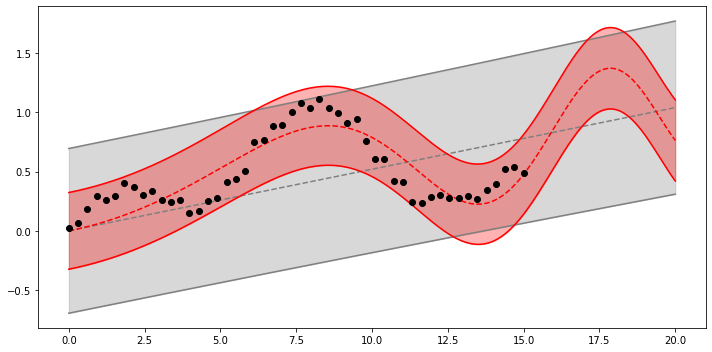

In [ ]:
np.random.seed(42)
# x = np.array(df.values)[:,0]
# y = np.array(df.values)[:,1]
x = np.linspace(0,15,50)
y = 0.2*np.sin(x) + 0.5*np.sin(x**2/40) + 0.05*x
y += 0.05*np.random.randn(x.shape[0])
m_linear = sm.OLS(y,x)
results = m_linear.fit()
scale = 3
design = np.concatenate((np.sin(x**2/40).reshape(-1,1), x.reshape(-1,1)),axis=1)
# WHAT IF IT DOESNT ZERO-OUT
m_linear_basis = sm.OLS(y,design)
# ERROR HERE
results_basis = m_linear_basis.fit()
# x_pred = np.linspace(0,60,200).reshape(-1,1)
x_pred = np.linspace(0,20,200).reshape(-1,1)
design_pred = np.concatenate((np.sin(x_pred**2/40).reshape(-1,1), x_pred.reshape(-1,1)),axis=1)
y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,zorder=2, color='black')
ax.plot(x_pred, y_pred_linear['mean'], color='gray',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'],color='gray',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'],color='gray',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'],y_pred_linear['obs_ci_upper'],color='gray',alpha=0.3,zorder=1)
ax.plot(x_pred, y_pred_linear_basis['mean'], color='red',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'],color='red',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'],color='red',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'],y_pred_linear_basis['obs_ci_upper'],color='red',alpha=0.3,zorder=1)
plt.tight_layout()
print(results_basis.params)

# Regularisation

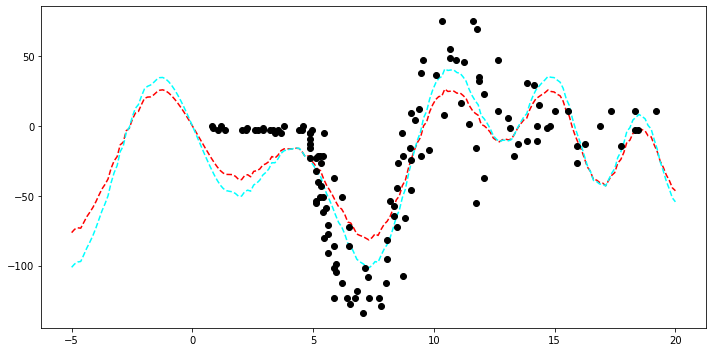

In [ ]:
np.random.seed(42)
x = np.array(df.values)[:,0]/3
y = np.array(df.values)[:,1]
# x = np.linspace(0,15,50)
# y = 0.2*np.sin(x) + 0.5*np.sin(x**2/40) + 0.05*x
# y += 0.05*np.random.randn(x.shape[0])
design = np.concatenate((np.sin(x).reshape(-1,1),np.sin(x**2/40).reshape(-1,1), x.reshape(-1,1),np.sin(x**2/20).reshape(-1,1),np.sin(x**3).reshape(-1,1)),axis=1)
m_linear_basis = sm.OLS(y,design)
results_basis_0 = m_linear_basis.fit_regularized(alpha=0.10,L1_wt=0.0)
# results_basis_1 = m_linear_basis.fit_regularized(alpha=0.10,L1_wt=0.3)
# results_basis_2 = m_linear_basis.fit_regularized(alpha=0.10,L1_wt=0.6)
results_basis_3 = m_linear_basis.fit_regularized(alpha=0.10,L1_wt=1.0)
x_pred = np.linspace(-5,20,200).reshape(-1,1)
# x_pred = np.linspace(-5,20,200).reshape(-1,1)
design_pred = np.concatenate((np.sin(x_pred), np.sin(x_pred**2/40),x_pred,np.sin(x_pred**2/20).reshape(-1,1),np.sin(x_pred**3).reshape(-1,1)),axis=1)
y_pred_0 = results_basis_0.predict(design_pred)
# y_pred_1 = results_basis_1.predict(design_pred)
# y_pred_2 = results_basis_2.predict(design_pred)
y_pred_3 = results_basis_3.predict(design_pred)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,zorder=2, color='black')
ax.plot(x_pred, y_pred_0, color='red', linestyle='--', zorder=1)
# ax.plot(x_pred, y_pred_1, color='orange', linestyle='--', zorder=1)
# ax.plot(x_pred, y_pred_2, color='magenta', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_3, color='cyan', linestyle='--', zorder=1)
plt.tight_layout()

### Q3: 
Why does the two regularisations presented above (ridge-regression and lasso) "prefer" different solutions?

Lasso and Ridge have some fundamental differences. Those arise from how model complexity is evaluated - lasso uses absolute value, while ridge uses sum of squares (distance from origin).

- Lasso can totally exclude certain coefficients - this will almost never happen in ridge
- For simmilar reasons, Lasso tends to pick coefficients further from each other, and ridge makes them more simmilar
- Neither is better, depends on the particular case

In the case of motorcycle data Lasso (L1 = 100%) seems to perform better

# Things to think about

•would it make sense to split up the data-set in different regions and fit separate models?
> yes: there is a clear difference to the first couple miliseconds, where there is no effect that took place yet. That is a constant line at zero, and does not visually or mathematically match the rest


•what is the criteria that you split the data using?
> Moment of impact effect - a moment around 15ms where the values depart from 0 abruptly

•what would be a sensible design matrix?
> for the first part - Linear, or even constant

> for the second part, a combination of sines and cosines that allows for a dampening effect

•what GLMmodels would make sense to fit?
> Normal (Gaussian) distribution is a good candidate, because this experiment is describing real world measurements, which predominantly follow this distribution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

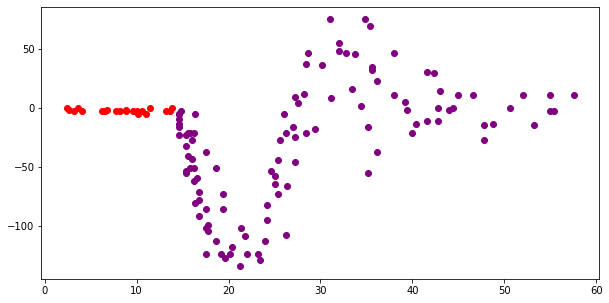

In [ ]:
dfA = df[:21]
dfB = df[21:]

xA = np.array(dfA.values)[:,0]
yA = np.array(dfA.values)[:,1]
xB = np.array(dfB.values)[:,0]
yB = np.array(dfB.values)[:,1]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(xB,yB, color="purple")
ax.scatter(xA,yA, color="red")

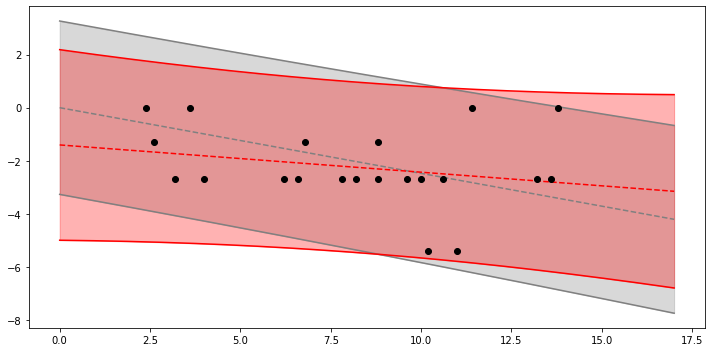

In [ ]:
x = np.array(dfA.values)[:,0]
y = np.array(dfA.values)[:,1]
m_linear = sm.OLS(y,x)
results = m_linear.fit()
design = np.concatenate((x.reshape(-1,1), (np.ones(shape=x.shape)).reshape(-1,1)),axis=1)
m_linear_basis = sm.OLS(y,design)
results_basis = m_linear_basis.fit()
x_pred = np.linspace(0,17,200).reshape(-1,1)
design_pred = np.concatenate((x_pred.reshape(-1,1), (np.ones(shape=x_pred.shape)).reshape(-1,1)),axis=1)
y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,zorder=2, color='black')
ax.plot(x_pred, y_pred_linear['mean'], color='gray',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'],color='gray',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'],color='gray',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'],y_pred_linear['obs_ci_upper'],color='gray',alpha=0.3,zorder=1)
ax.plot(x_pred, y_pred_linear_basis['mean'], color='red',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'],color='red',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'],color='red',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'],y_pred_linear_basis['obs_ci_upper'],color='red',alpha=0.3,zorder=1)
plt.tight_layout()

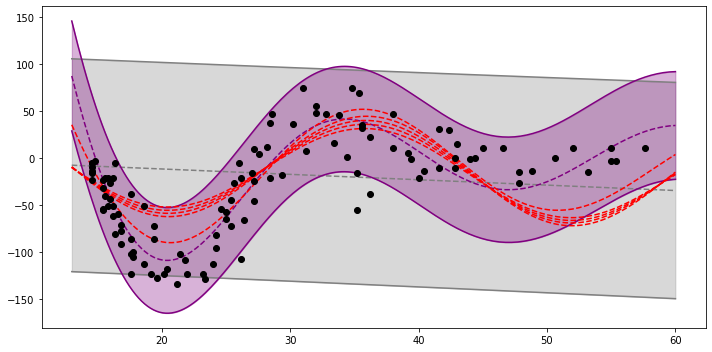

In [ ]:
x = np.array(dfB.values)[:,0]
y = np.array(dfB.values)[:,1]
ratio = 0.2
m_linear = sm.OLS(y,x)
results = m_linear.fit()
design = np.concatenate((np.sin(x*ratio).reshape(-1,1), np.cos(x*ratio).reshape(-1,1), np.divide(np.sin(x*ratio),x).reshape(-1,1), x.reshape(-1,1)),axis=1)
m_linear_basis = sm.OLS(y,design)
results_basis = m_linear_basis.fit()
x_pred = np.linspace(13,60,200).reshape(-1,1)
design_pred = np.concatenate((np.sin(x_pred*ratio).reshape(-1,1), np.cos(x_pred*ratio).reshape(-1,1), np.divide(np.sin(x_pred*ratio),x_pred).reshape(-1,1), x_pred.reshape(-1,1)),axis=1)
y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,zorder=2, color='black')
ax.plot(x_pred, y_pred_linear['mean'], color='gray',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'],color='gray',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'],color='gray',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'],y_pred_linear['obs_ci_upper'],color='gray',alpha=0.3,zorder=1)
ax.plot(x_pred, y_pred_linear_basis['mean'], color='purple',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'],color='purple',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'],color='purple',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'],y_pred_linear_basis['obs_ci_upper'],color='purple',alpha=0.3,zorder=1)

glm_basis = sm.GLM(y, design, family=sm.families.Gaussian())
ax.plot(x_pred, (glm_basis.fit_regularized(alpha=0.0001,L1_wt=1)).predict(design_pred), color='red', linestyle='--', zorder=1)
ax.plot(x_pred, (glm_basis.fit_regularized(alpha=0.0001,L1_wt=0.75)).predict(design_pred), color='red', linestyle='--', zorder=1)
ax.plot(x_pred, (glm_basis.fit_regularized(alpha=0.0001,L1_wt=0.5)).predict(design_pred), color='red', linestyle='--', zorder=1)
ax.plot(x_pred, (glm_basis.fit_regularized(alpha=0.0001,L1_wt=0.25)).predict(design_pred), color='red', linestyle='--', zorder=1)
ax.plot(x_pred, (glm_basis.fit_regularized(alpha=0.0001,L1_wt=0)).predict(design_pred), color='red', linestyle='--', zorder=1)

plt.tight_layout()

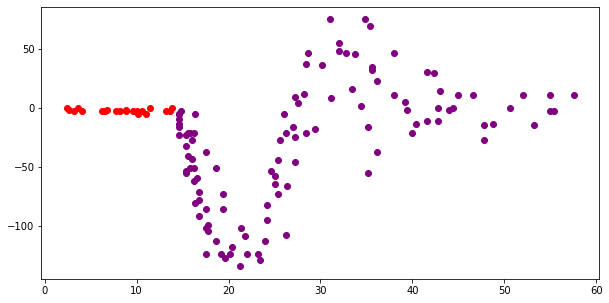

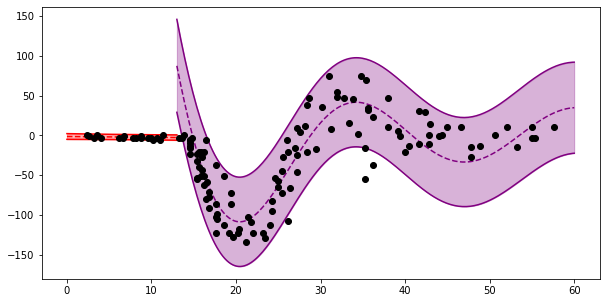

<Figure size 720x360 with 0 Axes>

In [ ]:
dfA = df[:21]
dfB = df[21:]

xA = np.array(dfA.values)[:,0]
yA = np.array(dfA.values)[:,1]
xB = np.array(dfB.values)[:,0]
yB = np.array(dfB.values)[:,1]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(xB,yB, color="purple")
ax.scatter(xA,yA, color="red")

#######################################################

x = np.array(dfA.values)[:,0]
y = np.array(dfA.values)[:,1]
m_linear = sm.OLS(y,x)
results = m_linear.fit()
design = np.concatenate((x.reshape(-1,1), (np.ones(shape=x.shape)).reshape(-1,1)),axis=1)
m_linear_basis = sm.OLS(y,design)
results_basis = m_linear_basis.fit()
x_pred = np.linspace(0,13,200).reshape(-1,1)
design_pred = np.concatenate((x_pred.reshape(-1,1), (np.ones(shape=x_pred.shape)).reshape(-1,1)),axis=1)
y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)
fig = plt.figure(figsize=(10,5))


ax = fig.add_subplot(111)
ax.scatter(x,y,zorder=2, color='black')
ax.plot(x_pred, y_pred_linear_basis['mean'], color='red',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'],color='red',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'],color='red',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'],y_pred_linear_basis['obs_ci_upper'],color='red',alpha=0.3,zorder=1)

#######################################################

x = np.array(dfB.values)[:,0]
y = np.array(dfB.values)[:,1]
ratio = 0.2
m_linear = sm.OLS(y,x)
results = m_linear.fit()
design = np.concatenate((np.sin(x*ratio).reshape(-1,1), np.cos(x*ratio).reshape(-1,1), np.divide(np.sin(x*ratio),x).reshape(-1,1), x.reshape(-1,1)),axis=1)
m_linear_basis = sm.OLS(y,design)
results_basis = m_linear_basis.fit()
x_pred = np.linspace(13,60,200).reshape(-1,1)
design_pred = np.concatenate((np.sin(x_pred*ratio).reshape(-1,1), np.cos(x_pred*ratio).reshape(-1,1), np.divide(np.sin(x_pred*ratio),x_pred).reshape(-1,1), x_pred.reshape(-1,1)),axis=1)
y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(10,5))
ax.scatter(x,y,zorder=2, color='black')
ax.plot(x_pred, y_pred_linear_basis['mean'], color='purple',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'],color='purple',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'],color='purple',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'],y_pred_linear_basis['obs_ci_upper'],color='purple',alpha=0.3,zorder=1)

#######################################################

plt.tight_layout()